In [1]:
# Carga de dataset
import pandas as pd
df = pd.read_csv('housepricedata.csv') # almacenamiento en datagrama
df.head(3)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1


In [2]:
# Conversión de datagrama a arreglo
dataset = df.values
X = dataset[:,0:10] # Atributos de entrada
Y = dataset[:,10] # Etiquetas

In [3]:
# Normalización
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
# Separación de datos de entrenamiento y validación
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)
print("el largo de X_train es", np.shape(X_train), "y el largo de X_test es", np.shape(X_test))

el largo de X_train es (1022, 10) y el largo de X_test es (438, 10)


In [5]:
# Construyendo la red
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
Y_train.shape

(1022,)

In [6]:
# Entrenamiento
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 2s 21ms/step - loss: 0.7004 - accuracy: 0.4286 - val_loss: 0.6986 - val_accuracy: 0.4452
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.4941 - val_loss: 0.6951 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.5939 - val_loss: 0.6917 - val_accuracy: 0.5297
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6842 - accuracy: 0.5949 - val_loss: 0.6884 - val_accuracy: 0.5479
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.5978 - val_loss: 0.6854 - val_accuracy: 0.5388
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.5636 - val_loss: 0.6821 - val_accuracy: 0.5502
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.5920 - val_loss: 0.6790 - val_accuracy: 0.5548
Epoch 8/100

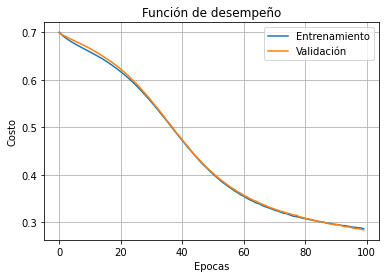

In [7]:
# Visualización de costo
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

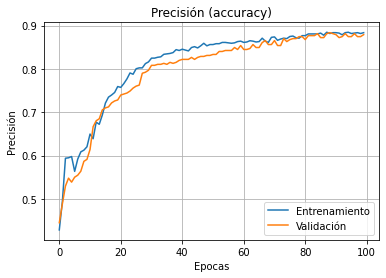

In [8]:
# Visualización de precisión

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()

In [9]:
# Ejemplo de sobreajuste

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.6905 - accuracy: 0.5029 - val_loss: 0.6890 - val_accuracy: 0.4589
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6846 - accuracy: 0.5176 - val_loss: 0.6847 - val_accuracy: 0.4589
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6794 - accuracy: 0.5284 - val_loss: 0.6804 - val_accuracy: 0.4635
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6743 - accuracy: 0.5548 - val_loss: 0.6757 - val_accuracy: 0.5228
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6690 - accuracy: 0.5714 - val_loss: 0.6703 - val_accuracy: 0.6005
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6635 - accuracy: 0.6477 - val_loss: 0.6648 - val_accuracy: 0.6575
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6574 - accuracy: 0.6840 - val_loss: 0.6584 - val_accuracy: 0.6918
Epoch 

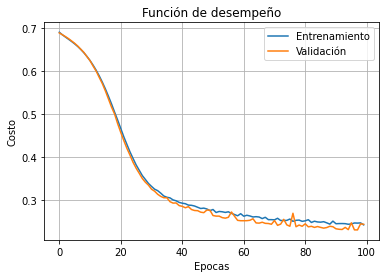

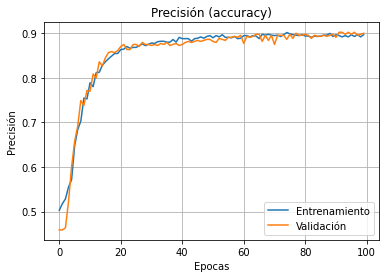

In [10]:
# Visualización del sobreajuste
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()

In [11]:
# Abordando el sobreajuste
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 3s 56ms/step - loss: 30.7092 - accuracy: 0.5225 - val_loss: 30.5133 - val_accuracy: 0.4589
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 30.3266 - accuracy: 0.5166 - val_loss: 30.1324 - val_accuracy: 0.4589
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 29.9471 - accuracy: 0.5205 - val_loss: 29.7563 - val_accuracy: 0.4589
Epoch 4/100
32/32 [==============================] - 2s 50ms/step - loss: 29.5729 - accuracy: 0.5186 - val_loss: 29.3850 - val_accuracy: 0.4589
Epoch 5/100
32/32 [==============================] - 2s 51ms/step - loss: 29.2043 - accuracy: 0.5176 - val_loss: 29.0184 - val_accuracy: 0.4589
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 28.8393 - accuracy: 0.5157 - val_loss: 28.6562 - val_accuracy: 0.4589
Epoch 7/100
32/32 [==============================] - 2s 49ms/step - loss: 28.4799 - accuracy: 0.5166 - val_loss: 28.2985 - val_accuracy:

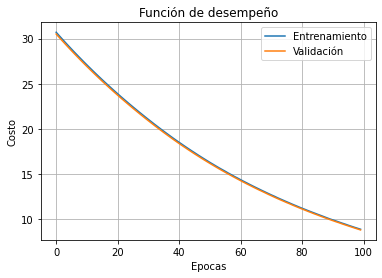

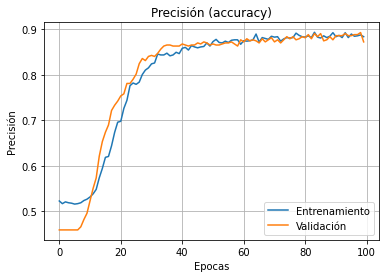

In [12]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()